In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/competitive-data-science-predict-future-sales/items.csv
/kaggle/input/competitive-data-science-predict-future-sales/sample_submission.csv
/kaggle/input/competitive-data-science-predict-future-sales/item_categories.csv
/kaggle/input/competitive-data-science-predict-future-sales/sales_train.csv
/kaggle/input/competitive-data-science-predict-future-sales/shops.csv
/kaggle/input/competitive-data-science-predict-future-sales/test.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Exploratory Data Analysis (EDA)
# Keşifsel Veri Analizi (EDA)

In [3]:
train = pd.read_csv('../input/competitive-data-science-predict-future-sales/sales_train.csv', parse_dates = ['date'], infer_datetime_format = True, dayfirst = True)
test=pd.read_csv("/kaggle/input/competitive-data-science-predict-future-sales/test.csv")
item_categories=pd.read_csv("/kaggle/input/competitive-data-science-predict-future-sales/item_categories.csv")
items=pd.read_csv("/kaggle/input/competitive-data-science-predict-future-sales/items.csv")
sample_submission=pd.read_csv("/kaggle/input/competitive-data-science-predict-future-sales/sample_submission.csv")
shops=pd.read_csv("/kaggle/input/competitive-data-science-predict-future-sales/shops.csv")

In [4]:
print(f'sales_train verilerindeki satır sayısı: {train.shape[0]}')
print(f'sales_train verilerindeki sütun sayısı: {train.shape[1]}')
print(f'sales_train verilerindeki değer sayısı: {train.count().sum()}')
print(f'sales_train verilerindeki eksik değerlerin sayısı: {sum(train.isna().sum())}')
train.head()

sales_train verilerindeki satır sayısı: 2935849
sales_train verilerindeki sütun sayısı: 6
sales_train verilerindeki değer sayısı: 17615094
sales_train verilerindeki eksik değerlerin sayısı: 0


,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,2013-01-02,0,59,22154,999.00,1.0
1,2013-01-03,0,25,2552,899.00,1.0
2,2013-01-05,0,25,2552,899.00,-1.0
3,2013-01-06,0,25,2554,1709.05,1.0
4,2013-01-15,0,25,2555,1099.00,1.0


In [5]:
print(f'test verilerindeki satır sayısı: {test.shape[0]}')
print(f'test verilerindeki sütun sayısı: {test.shape[1]}')
print(f'test verilerindeki değer sayısı: {test.count().sum()}')
print(f'test verilerindeki eksik değerlerin sayısı: {sum(test.isna().sum())}')
item_categories.head()

test verilerindeki satır sayısı: 214200
test verilerindeki sütun sayısı: 3
test verilerindeki değer sayısı: 642600
test verilerindeki eksik değerlerin sayısı: 0


,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4


In [6]:
print(f'items verilerindeki satır sayısı: {items.shape[0]}')
print(f'items verilerindeki sütun sayısı: {items.shape[1]}')
print(f'items verilerindeki değer sayısı: {items.count().sum()}')
print(f'items verilerindeki eksik değerlerin sayısı: {sum(items.isna().sum())}')
items.head()

items verilerindeki satır sayısı: 22170
items verilerindeki sütun sayısı: 3
items verilerindeki değer sayısı: 66510
items verilerindeki eksik değerlerin sayısı: 0


,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40


In [7]:
print(f'sample_submission verilerindeki satır sayısı: {sample_submission.shape[0]}')
print(f'sample_submission verilerindeki sütun sayısı: {sample_submission.shape[1]}')
print(f'sample_submission verilerindeki değer sayısı: {sample_submission.count().sum()}')
print(f'sample_submission verilerindeki eksik değerlerin sayısı: {sum(sample_submission.isna().sum())}')
sample_submission.head()

sample_submission verilerindeki satır sayısı: 214200
sample_submission verilerindeki sütun sayısı: 2
sample_submission verilerindeki değer sayısı: 428400
sample_submission verilerindeki eksik değerlerin sayısı: 0


,ID,item_cnt_month
0,0,0.5
1,1,0.5
2,2,0.5
3,3,0.5
4,4,0.5


In [8]:
print(f'shops verilerindeki satır sayısı: {shops.shape[0]}')
print(f'shops verilerindeki sütun sayısı: {shops.shape[1]}')
print(f'shops verilerindeki değer sayısı: {shops.count().sum()}')
print(f'shops verilerindeki eksik değerlerin sayısı: {sum(shops.isna().sum())}')
shops.head()

shops verilerindeki satır sayısı: 60
shops verilerindeki sütun sayısı: 2
shops verilerindeki değer sayısı: 120
shops verilerindeki eksik değerlerin sayısı: 0


,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4


In [9]:
print(f'item_categories verilerindeki satır sayısı: {item_categories.shape[0]}')
print(f'item_categories verilerindeki sütun sayısı: {item_categories.shape[1]}')
print(f'item_categories verilerindeki değer sayısı: {item_categories.count().sum()}')
print(f'item_categories verilerindeki eksik değerlerin sayısı: {sum(item_categories.isna().sum())}')
item_categories.head()

item_categories verilerindeki satır sayısı: 84
item_categories verilerindeki sütun sayısı: 2
item_categories verilerindeki değer sayısı: 168
item_categories verilerindeki eksik değerlerin sayısı: 0


,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4


#### Bring all the data together to create a clear EDA and find some compelling insights from the data.
#### Net bir EDA oluşturmak ve verilerden bazı ilgi çekici içgörüler bulmak için tüm verileri bir araya getirin.


In [10]:
df_eda = pd.merge(train, shops, how='left', left_on = 'shop_id', right_on = 'shop_id')
df_eda = pd.merge(df_eda, items, how='left', left_on='item_id', right_on='item_id')
df_eda = pd.merge(df_eda, item_categories, how='left', left_on='item_category_id', right_on='item_category_id')
df_eda.drop(['item_id', 'item_category_id', 'shop_id'], axis=1, inplace=True)
df_eda.head()

,date,date_block_num,item_price,item_cnt_day,shop_name,item_name,item_category_name
0,2013-01-02,0,999.00,1.0,"Ярославль ТЦ ""Альтаир""",ЯВЛЕНИЕ 2012 (BD),Кино - Blu-Ray
1,2013-01-03,0,899.00,1.0,"Москва ТРК ""Атриум""",DEEP PURPLE The House Of Blue Light LP,Музыка - Винил
2,2013-01-05,0,899.00,-1.0,"Москва ТРК ""Атриум""",DEEP PURPLE The House Of Blue Light LP,Музыка - Винил
3,2013-01-06,0,1709.05,1.0,"Москва ТРК ""Атриум""",DEEP PURPLE Who Do You Think We Are LP,Музыка - Винил
4,2013-01-15,0,1099.00,1.0,"Москва ТРК ""Атриум""",DEEP PURPLE 30 Very Best Of 2CD (Фирм.),Музыка - CD фирменного производства


In [11]:
print(df_eda.shape)

(2935849, 7)


In [12]:
df_eda.columns

Index(['date', 'date_block_num', 'item_price', 'item_cnt_day', 'shop_name',
       'item_name', 'item_category_name'],
      dtype='object')

In [13]:
df_eda.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2935849 entries, 0 to 2935848
Data columns (total 7 columns):
 #   Column              Dtype         
---  ------              -----         
 0   date                datetime64[ns]
 1   date_block_num      int64         
 2   item_price          float64       
 3   item_cnt_day        float64       
 4   shop_name           object        
 5   item_name           object        
 6   item_category_name  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 179.2+ MB


#### change the data type of column 'date'
#### 'tarih' sütununun veri türünü değiştirin

In [14]:
df_eda['date'] = pd.to_datetime(df_eda['date'])
df_eda.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2935849 entries, 0 to 2935848
Data columns (total 7 columns):
 #   Column              Dtype         
---  ------              -----         
 0   date                datetime64[ns]
 1   date_block_num      int64         
 2   item_price          float64       
 3   item_cnt_day        float64       
 4   shop_name           object        
 5   item_name           object        
 6   item_category_name  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 179.2+ MB


#### Check if we have duplicate rows.
#### Yinelenen satırlarımız olup olmadığını kontrol edin.

In [15]:
df_eda.duplicated().sum()

6

In [16]:
# Yinelenen satırlara bir göz atın (ilk satırlar)
df_eda[df_eda.duplicated(keep='first')]

,date,date_block_num,item_price,item_cnt_day,shop_name,item_name,item_category_name
76962,2013-01-05,0,149.0,1.0,"Химки ТЦ ""Мега""",УЧЕНИК ЧАРОДЕЯ (регион),Кино - DVD
1435367,2014-02-23,13,999.0,1.0,"Тюмень ТЦ ""Гудвин""","Far Cry 3 (Classics) [Xbox 360, русская версия]",Игры - XBOX 360
1496766,2014-03-23,14,999.0,1.0,"Москва МТРЦ ""Афи Молл""","Far Cry 3 (Classics) [Xbox 360, русская версия]",Игры - XBOX 360
1671873,2014-05-01,16,999.0,1.0,"Тюмень ТЦ ""Гудвин""","Far Cry 3 (Classics) [Xbox 360, русская версия]",Игры - XBOX 360
1866340,2014-07-12,18,999.0,1.0,"Москва ТРК ""Атриум""","Far Cry 3 (Classics) [Xbox 360, русская версия]",Игры - XBOX 360
2198566,2014-12-31,23,499.0,1.0,"СПб ТК ""Невский Центр""",ЧЕЛОВЕК ДОЖДЯ (BD),Кино - Blu-Ray


#### Take a look at the duplicate lines (second lines)
#### Yinelenen satırlara bir göz atın (ikinci satırlar)

In [17]:
df_eda[df_eda.duplicated(keep='last')]

,date,date_block_num,item_price,item_cnt_day,shop_name,item_name,item_category_name
76961,2013-01-05,0,149.0,1.0,"Химки ТЦ ""Мега""",УЧЕНИК ЧАРОДЕЯ (регион),Кино - DVD
1435365,2014-02-23,13,999.0,1.0,"Тюмень ТЦ ""Гудвин""","Far Cry 3 (Classics) [Xbox 360, русская версия]",Игры - XBOX 360
1496765,2014-03-23,14,999.0,1.0,"Москва МТРЦ ""Афи Молл""","Far Cry 3 (Classics) [Xbox 360, русская версия]",Игры - XBOX 360
1671872,2014-05-01,16,999.0,1.0,"Тюмень ТЦ ""Гудвин""","Far Cry 3 (Classics) [Xbox 360, русская версия]",Игры - XBOX 360
1866322,2014-07-12,18,999.0,1.0,"Москва ТРК ""Атриум""","Far Cry 3 (Classics) [Xbox 360, русская версия]",Игры - XBOX 360
2198564,2014-12-31,23,499.0,1.0,"СПб ТК ""Невский Центр""",ЧЕЛОВЕК ДОЖДЯ (BD),Кино - Blu-Ray


In [18]:
# Yinelenen satırları silme
df_eda.drop_duplicates(keep='first', inplace=True)
df_eda.duplicated().sum()

0

# Data Viz
# Veri Görselleştirme

#### Mağaza adına göre satışlara göz atmak için bar grafiği oluşturma


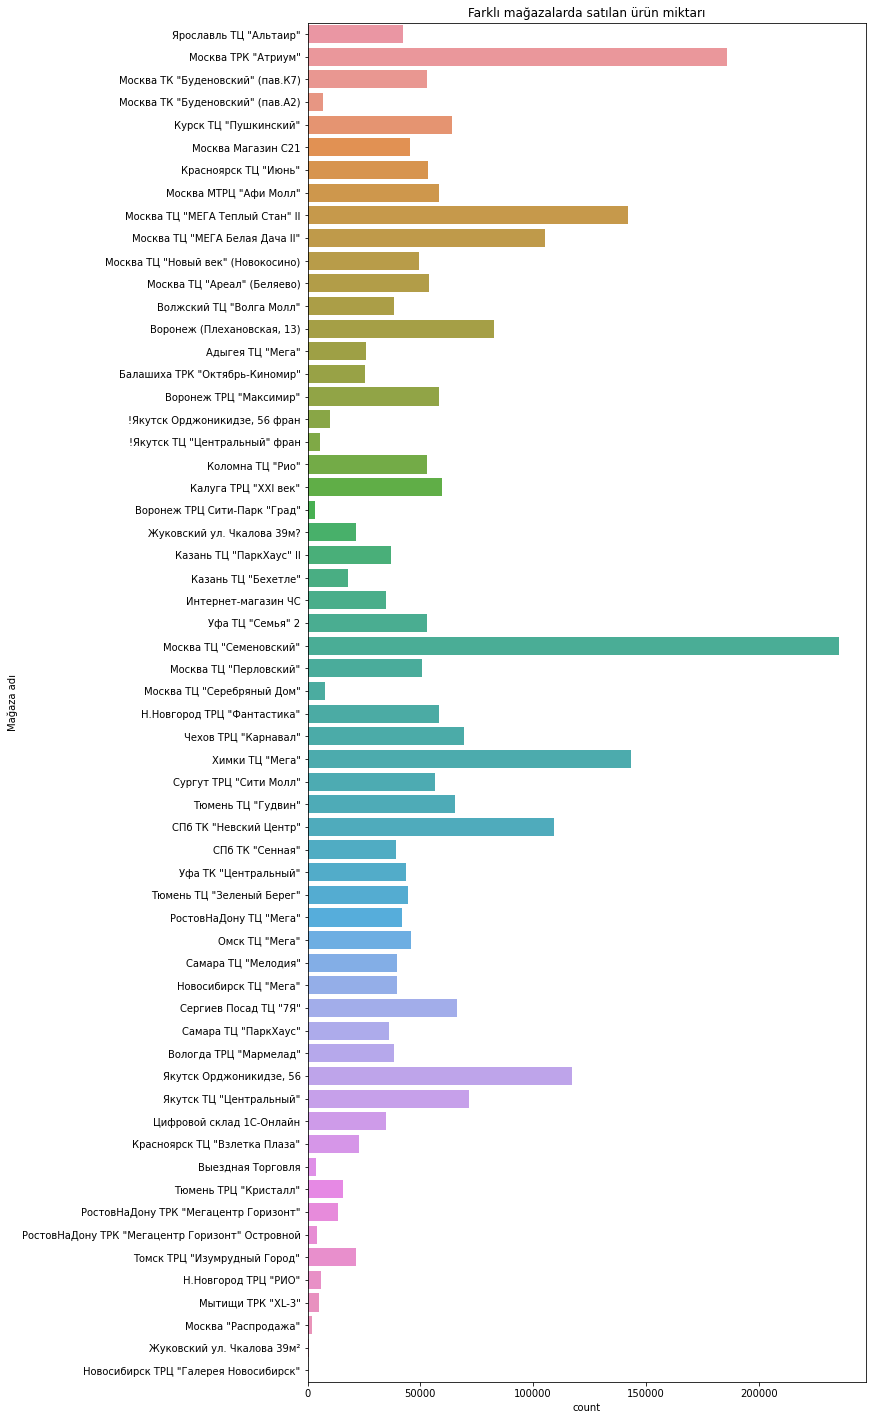

In [19]:
plt.figure(figsize=(10, 25))
sns.countplot(y=df_eda['shop_name'])
plt.ylabel('Mağaza adı')
plt.title('Farklı mağazalarda satılan ürün miktarı')
plt.show()

#### Find and plan your top 10 products
#### En çok satan 10 ürünü bulun ve planlayın

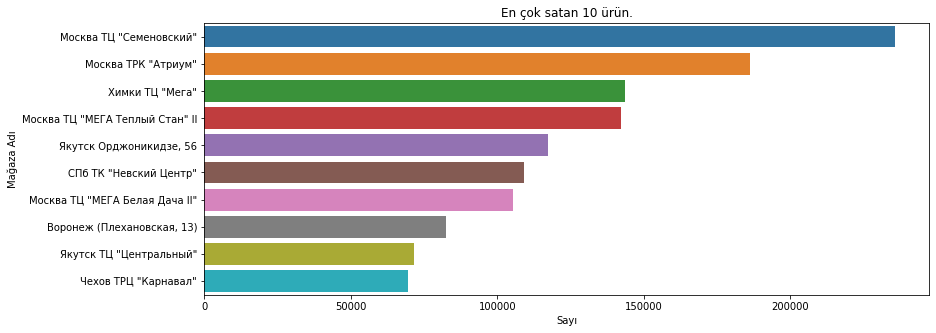

In [20]:
top_10_selling_item = df_eda['shop_name'].value_counts().head(10)
top_10_selling_item = top_10_selling_item.to_frame().reset_index()
top_10_selling_item.columns = ['shop_name', 'count']
plt.figure(figsize=(13, 5))
sns.barplot(data=top_10_selling_item, x='count', y='shop_name')
plt.title('En çok satan 10 ürün.')
plt.ylabel('Mağaza Adı')
plt.xlabel('Sayı')
plt.show()

#### Find and plot top 10 selling categories of products
#### En çok satan 10 ürün kategorisini bulun ve planlayın

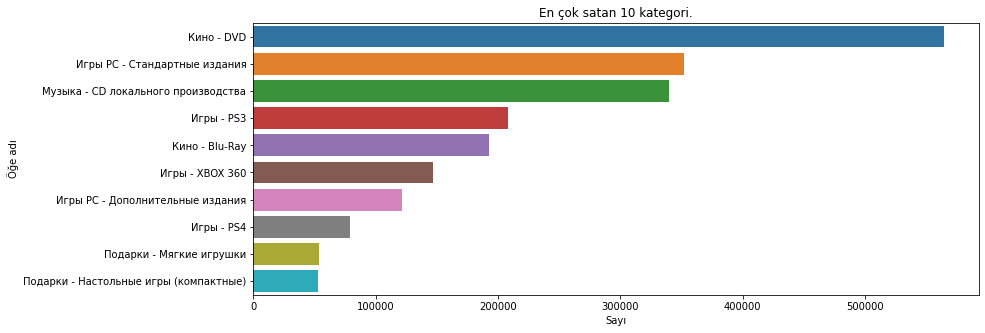

In [21]:
top_10_selling_category = df_eda['item_category_name'].value_counts().head(10)
top_10_selling_category = top_10_selling_category.to_frame().reset_index()
top_10_selling_category.columns = ['item_name', 'count']
plt.figure(figsize=(13, 5))
sns.barplot(data=top_10_selling_category, x='count', y='item_name')
plt.title('En çok satan 10 kategori.')
plt.ylabel('Öğe adı')
plt.xlabel('Sayı')
plt.show()

#### Function to plot trends from column list.
#### Sütun listesinden eğilimleri çizme işlevi.

In [22]:
def plot_trend(columns):
    for column in columns:
        movies = df_eda[df_eda['item_category_name'] == column]
        movies = movies.groupby('date_block_num')['item_cnt_day'].sum().to_frame().reset_index()
        plt.figure(figsize=(20,4))
        plt.axhline (y =movies['item_cnt_day'].mean(), color='red', linewidth = 1, linestyle ='dashed', label = 'Tüm zamanlar için ortalama satışlar.')
        sns.lineplot(data=movies, x='date_block_num', y='item_cnt_day', label = 'Trend line.')
        plt.title('Satın alma eğilimi ' + str(column) + '.', fontsize=14)
        plt.legend(loc = 'upper right')
        plt.xlabel('Ay Sayısı (Ocak 2013ten Ekim 2015e kadar)')
        plt.ylabel('Satılan ürünler')
        plt.show()
        print('\n')

#### Calling the function from the previous cell
#### Fonksiyonu önceki hücreden çağırma

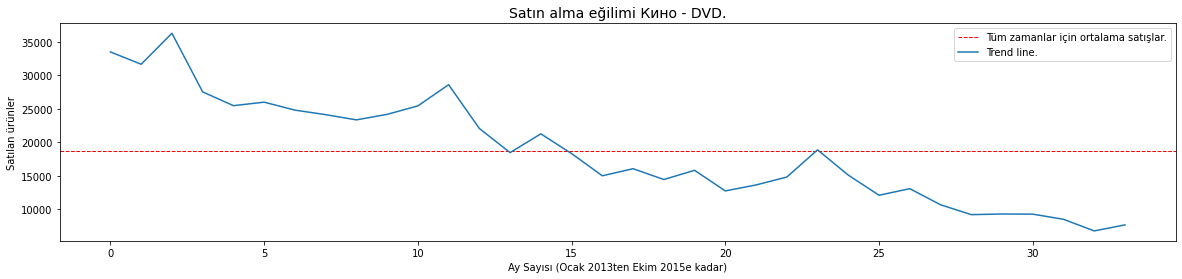

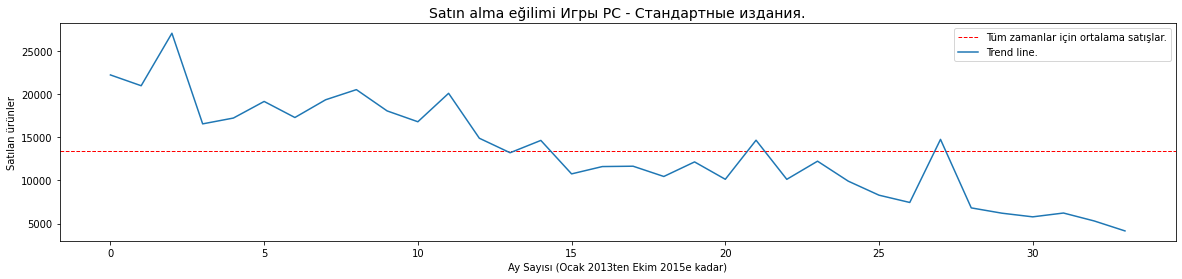

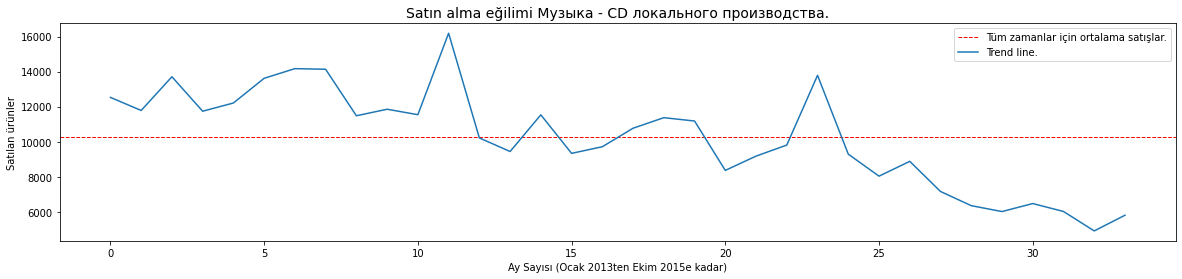

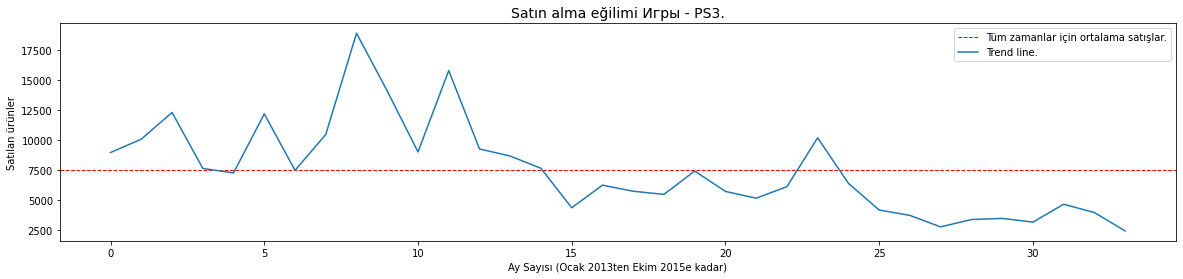

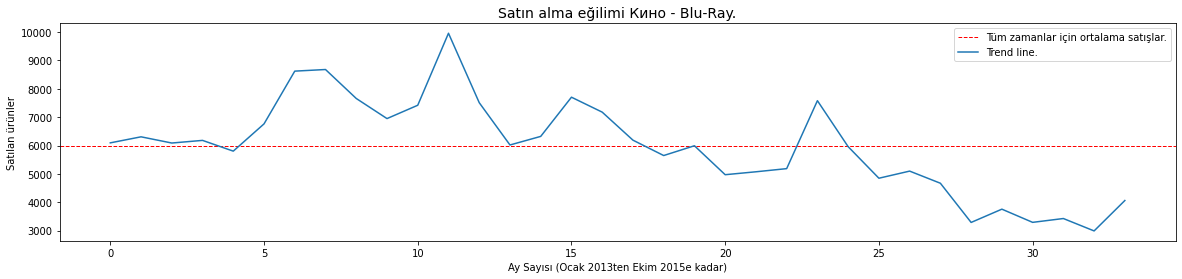

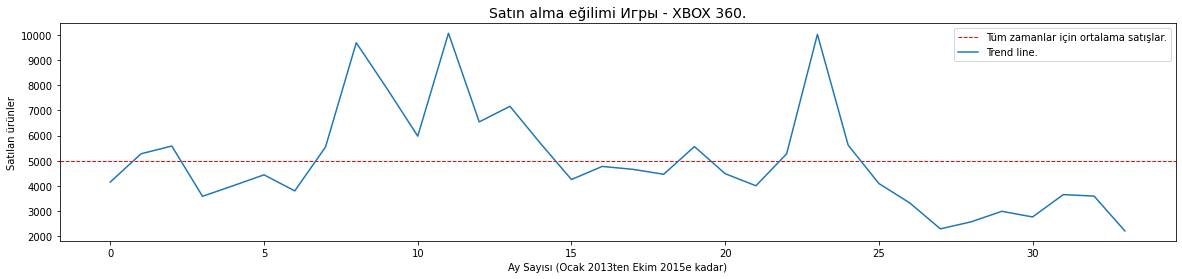

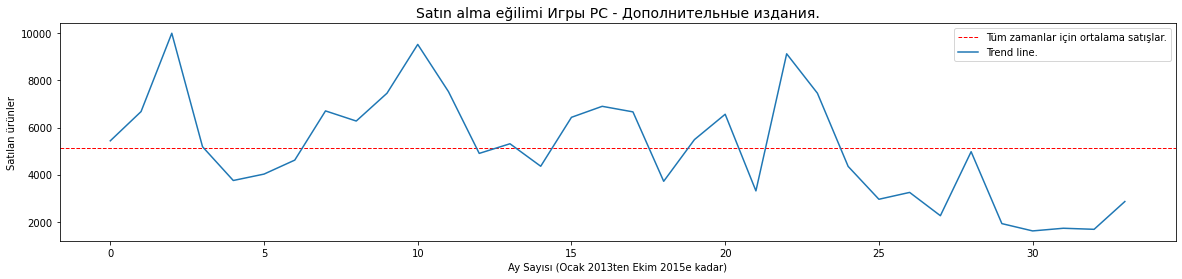

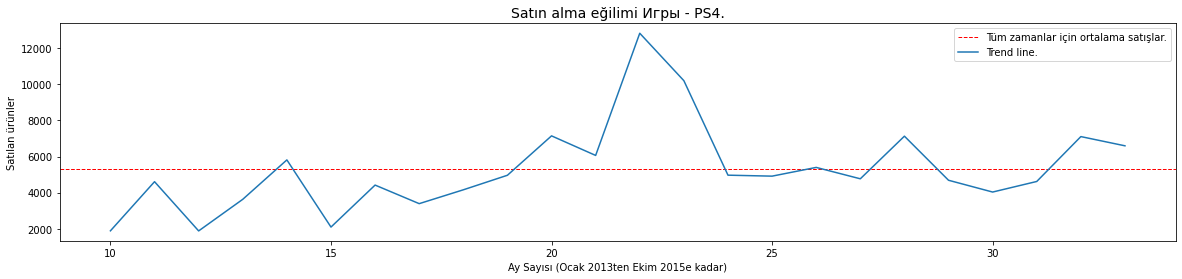

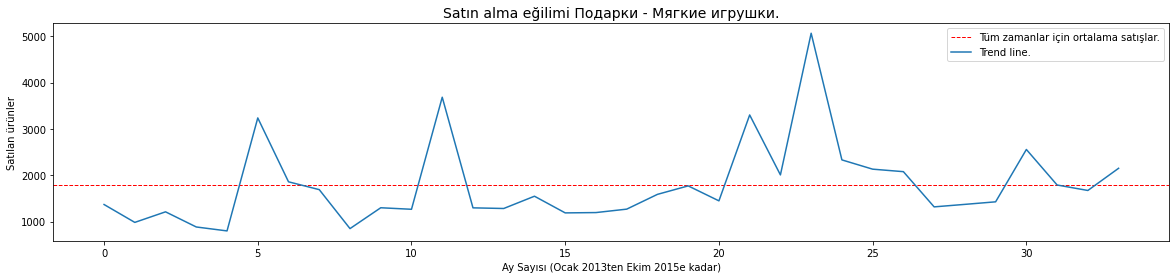

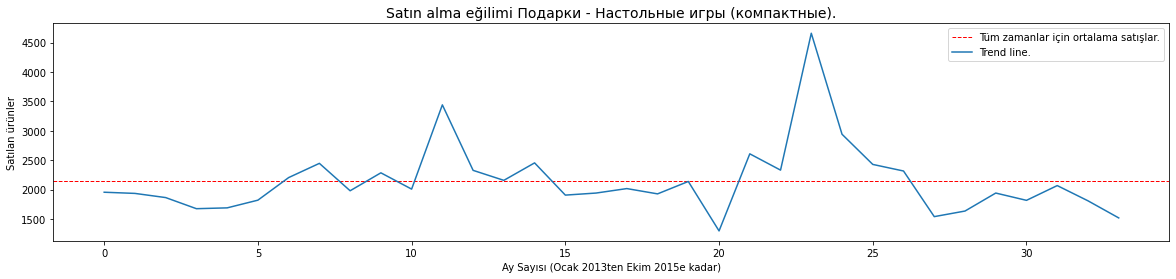

In [23]:
plot_trend(list(top_10_selling_category['item_name']))

### Here we can clearly see the trend increasing in the category "gifts", "board games" and "games for ps4", while in other categories the trend seems to decrease

### Burada "hediyeler", "masa oyunları" ve "ps4 için oyunlar" kategorisinde trendin arttığını açıkça görebiliriz, diğer kategorilerde trendin düştüğü görülüyor

#### looking at the number of different categories
#### farklı kategori sayısına bakmak

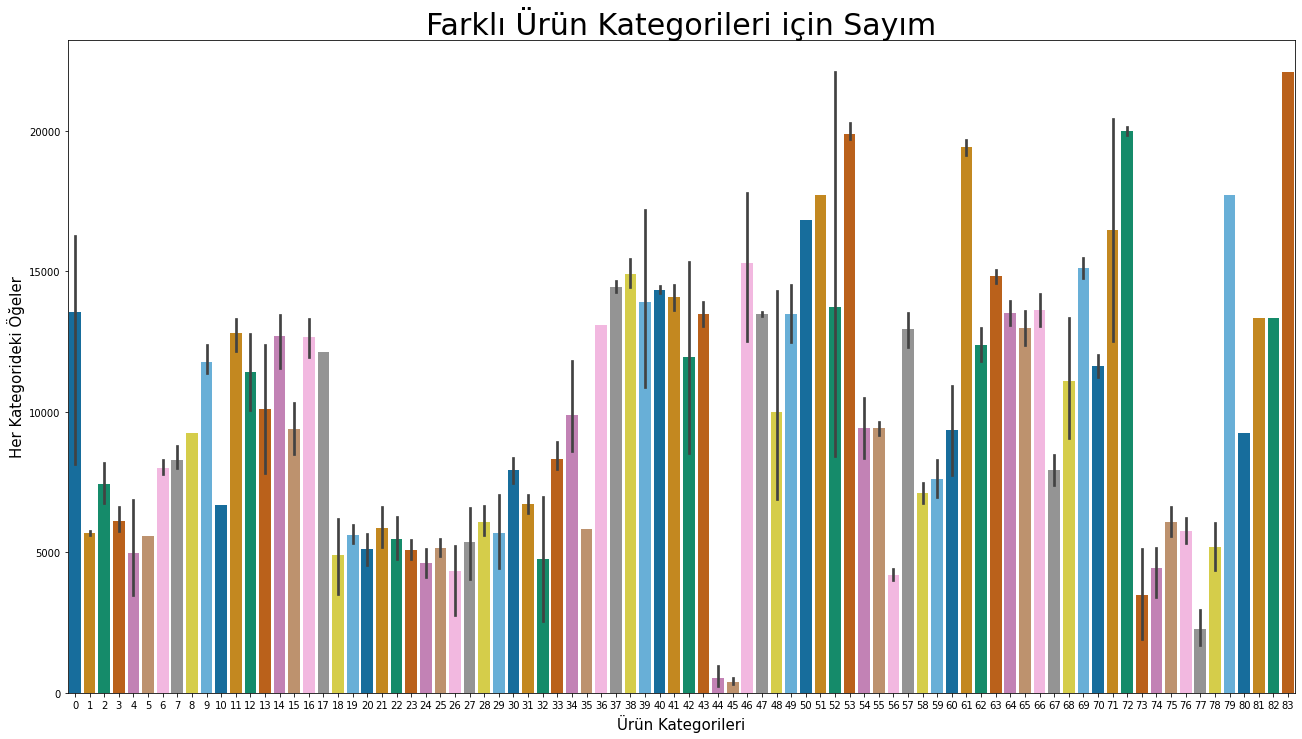

In [24]:
plt.rcParams['figure.figsize'] = (22, 12)
sns.barplot(items['item_category_id'], items['item_id'], palette = 'colorblind')
plt.title('Farklı Ürün Kategorileri için Sayım', fontsize = 30)
plt.xlabel('Ürün Kategorileri', fontsize = 15)
plt.ylabel('Her Kategorideki Öğeler', fontsize = 15)
plt.show()

#### take a look at the daily distribution of products sold
#### günlük satılan ürün dağılımına bir göz atmak

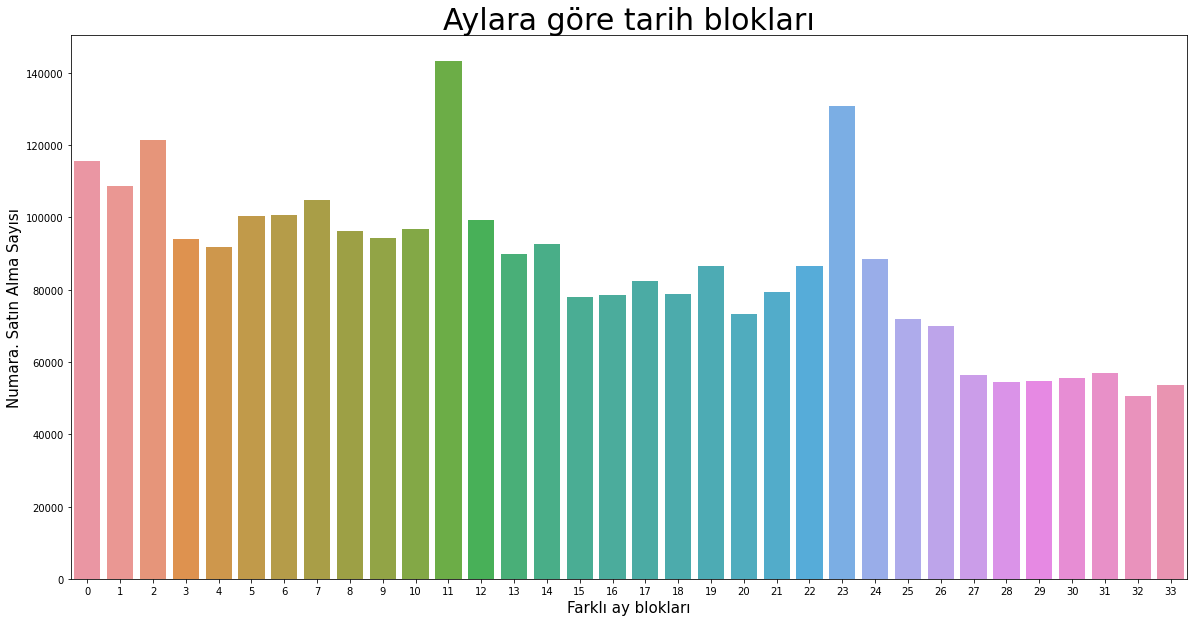

In [25]:
plt.rcParams['figure.figsize'] = (20, 10)
sns.countplot(train['date_block_num'])
plt.title('Aylara göre tarih blokları', fontsize = 30)
plt.xlabel('Farklı ay blokları', fontsize = 15)
plt.ylabel('Numara. Satın Alma Sayısı', fontsize = 15)
plt.show()

#### converting data to monthly sales data
#### verileri aylık satış verilerine dönüştürme

In [26]:
# sadece aylık satış verileriyle bir veri seti oluşturma
# create a dataset with only monthly sales data
data = train.groupby([train['date'].apply(lambda x: x.strftime('%Y-%m')),'item_id','shop_id']).sum().reset_index()

In [27]:
# verilere eklemek istediğimiz önemli özellikleri belirtmek
# specify the important features we want to add to the data
data = data[['date','item_id','shop_id','item_cnt_day']]

In [28]:
# sonunda veri kümesinden önemli olan belirli özellikleri seçebiliriz
# finally we can select specific features from the dataset that are important
data = data.pivot_table(index=['item_id','shop_id'], columns = 'date', values = 'item_cnt_day', fill_value = 0).reset_index()

In [29]:
# yeni hazırlanan veri setine bakılıyor
# looking at newly prepared dataset
data.shape

(424124, 36)

In [30]:
# Hazırlanan aylık satış verilerini test veri seti ile birleştirelim
# Let's combine the prepared monthly sales data with the test data set
test = pd.merge(test, data, on = ['item_id', 'shop_id'], how = 'left')

In [31]:
# veri setinde bulunan boş değerlerin doldurulması
# filling in blanks in the dataset
test.fillna(0, inplace = True)

In [32]:
# veri setini kontrol etme
# check the dataset
test.head()

,ID,shop_id,item_id,2013-01,2013-02,2013-03,2013-04,2013-05,2013-06,2013-07,...,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10
0,0,5,5037,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,1.0,1.0,1.0,3.0,1.0,0.0
1,1,5,5320,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,5,5233,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,2.0,0.0,1.0,3.0,1.0
3,3,5,5232,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,4,5,5268,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Model Building
# Model Oluşturma

#### now let's generate real training data
#### şimdi gerçek eğitim verilerini oluşturalım

In [33]:
x_train = test.drop(['2015-10', 'item_id', 'shop_id'], axis = 1)
y_train = test['2015-10']

#### delete the first column so it can predict future sales data
#### gelecekteki satış verilerini tahmin edebilmesi için ilk sütunu silme

In [34]:
x_test = test.drop(['2013-01', 'item_id', 'shop_id'], axis = 1)

In [35]:
# veri setlerinin şekillerini kontrol etme
# checking the shapes of datasets
print("Shape of x_train :", x_train.shape)
print("Shape of x_test :", x_test.shape)
print("Shape of y_test :", y_train.shape)

Shape of x_train : (214200, 34)
Shape of x_test : (214200, 34)
Shape of y_test : (214200,)


In [36]:
# x_train veri setini kontrol edelim
# Let's check the x_train dataset
x_train.head()

,ID,2013-01,2013-02,2013-03,2013-04,2013-05,2013-06,2013-07,2013-08,2013-09,...,2014-12,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,2.0,0.0,0.0,0.0,1.0,1.0,1.0,3.0,1.0
1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,3.0,2.0,0.0,1.0,3.0
3,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [37]:
# x_test verilerini kontrol edelim
# Let's check the x_test data
x_test.head()

,ID,2013-02,2013-03,2013-04,2013-05,2013-06,2013-07,2013-08,2013-09,2013-10,...,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,1.0,1.0,1.0,3.0,1.0,0.0
1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,2.0,0.0,1.0,3.0,1.0
3,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### split data into train and current dataset
#### verileri tren ve geçerli veri kümesine ayırma

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size = 0.2, random_state = 0)

In [40]:
print("Shape of x_train :", x_train.shape)
print("Shape of x_valid :", x_valid.shape)
print("Shape of y_train :", y_train.shape)
print("Shape of y_valid :", y_valid.shape)

Shape of x_train : (171360, 34)
Shape of x_valid : (42840, 34)
Shape of y_train : (171360,)
Shape of y_valid : (42840,)


## LGBMRegressor

In [41]:
from lightgbm import LGBMRegressor

model_lgb = LGBMRegressor( n_estimators=200,
                           learning_rate=0.03,
                           num_leaves=32,
                           colsample_bytree=0.9497036,
                           subsample=0.8715623,
                           max_depth=8,
                           reg_alpha=0.04,
                           reg_lambda=0.073,
                           min_split_gain=0.0222415,
                           min_child_weight=40)
model_lgb.fit(x_train, y_train)

y_pred_lgb = model_lgb.predict(x_test)

In [42]:
y_pred_lgb = model_lgb.predict(x_test).clip(0., 20.)

#### Create and send the submission file
#### Gönderim dosyasını oluşturun ve gönderin

In [43]:
preds = pd.DataFrame(y_pred_lgb, columns=['item_cnt_month'])
preds.to_csv('submission.csv',index_label='ID')